In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count, countDistinct

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import min, max

import matplotlib.pyplot as plt
import pandas as pd

from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.types import DoubleType
import os

In [2]:
spark = SparkSession.builder.master("local") \
    .appName("EDA on Mips Overall Performance data") \
    .getOrCreate()
    # .config("spark.executor.extraJavaOptions", "-XX:+UseG1GC") \

# spark.conf.set("spark.executor.extraJavaOptions", "-XX:+UseG1GC -XX:InitiatingHeapOccupancyPercent=35")



In [3]:
root_path = 'sample-data/doctorright-datalake'

dfs = {}

for i, file in enumerate(os.listdir(root_path)):
    if file.endswith(".parquet"):
        dfs[f"df_{i}"] = spark.read.parquet(f"{root_path}/{file}")

print(dfs.keys())



dict_keys(['df_0', 'df_1', 'df_2', 'df_3', 'df_4', 'df_5', 'df_6', 'df_7'])


In [4]:
for key, df in dfs.items():
    print(key)
    print(df.printSchema())
    

df_0
root
 |-- NPI: integer (nullable = true)
 |-- Ind_PAC_ID: long (nullable = true)
 |-- Ind_enrl_ID: string (nullable = true)
 |-- Provider_Last_Name: string (nullable = true)
 |-- Provider_First_Name: string (nullable = true)
 |-- Provider_Middle_Name: string (nullable = true)
 |-- suff: string (nullable = true)
 |-- gndr: string (nullable = true)
 |-- Cred: string (nullable = true)
 |-- Med_sch: string (nullable = true)
 |-- Grd_yr: integer (nullable = true)
 |-- pri_spec: string (nullable = true)
 |-- sec_spec_1: string (nullable = true)
 |-- sec_spec_2: string (nullable = true)
 |-- sec_spec_3: string (nullable = true)
 |-- sec_spec_4: string (nullable = true)
 |-- sec_spec_all: string (nullable = true)
 |-- Telehlth: string (nullable = true)
 |-- Facility_Name: string (nullable = true)
 |-- org_pac_id: long (nullable = true)
 |-- num_org_mem: integer (nullable = true)
 |-- adr_ln_1: string (nullable = true)
 |-- adr_ln_2: string (nullable = true)
 |-- ln_2_sprs: string (nullabl

# Joining dataframes

prefix : sample-data\doctorright-datalake\hive_metastore.mips_data.
suffix : .parquet

### DF Index
- df_0 : doctorslocationsaffiliations
- df_1 : facility_affiliation
- df_2 : grp_public_reporting_patient_erp
- df_3 : measures_clinical_public_reeporting
- df_4 : measures_grp_public_reeporting
- df_5 : measures_virtual_public_reeporting
- df_6 : overall_performance
- df_7 : procedurevolume

### Common DFs containing NPI
- df_0, df_1, df_3, df_6, df_7

### Common DFs containing Facility name & Org_PAC_ID
- df_2, df_4

### df_5 has a virtual_group_id

In [4]:
df_0_to_7 = dfs['df_0'].join(dfs['df_1'], on='NPI', how='inner') 
df_0_to_7 = df_0_to_7.join(dfs['df_3'], on='NPI', how='inner') 
df_0_to_7 = df_0_to_7.join(dfs['df_6'], on='NPI', how='inner')
df_0_to_7 = df_0_to_7.join(dfs['df_7'], on='NPI', how='inner') 
df_0_to_7.printSchema()

root
 |-- NPI: integer (nullable = true)
 |-- Ind_PAC_ID: long (nullable = true)
 |-- Ind_enrl_ID: string (nullable = true)
 |-- Provider_Last_Name: string (nullable = true)
 |-- Provider_First_Name: string (nullable = true)
 |-- Provider_Middle_Name: string (nullable = true)
 |-- suff: string (nullable = true)
 |-- gndr: string (nullable = true)
 |-- Cred: string (nullable = true)
 |-- Med_sch: string (nullable = true)
 |-- Grd_yr: integer (nullable = true)
 |-- pri_spec: string (nullable = true)
 |-- sec_spec_1: string (nullable = true)
 |-- sec_spec_2: string (nullable = true)
 |-- sec_spec_3: string (nullable = true)
 |-- sec_spec_4: string (nullable = true)
 |-- sec_spec_all: string (nullable = true)
 |-- Telehlth: string (nullable = true)
 |-- Facility_Name: string (nullable = true)
 |-- org_pac_id: long (nullable = true)
 |-- num_org_mem: integer (nullable = true)
 |-- adr_ln_1: string (nullable = true)
 |-- adr_ln_2: string (nullable = true)
 |-- ln_2_sprs: string (nullable = t

In [6]:
df_0_to_7.show(5)

+----------+----------+---------------+------------------+-------------------+--------------------+----+----+----+--------------------+------+--------------------+--------------------+-----------------+----------+----------+--------------------+--------+--------------------+----------+-----------+----------------+---------+---------+---------+-----+---------+----------------+---------+---------+--------------------+---------+----------+------------------+-------------------+--------------------+----+-------------+------------------------------------------+----------------------------------+----------+------------------+-------------------+----------+----------+----------+----------+-------------+--------------------+--------+-----------------+--------+-------------+----------+-------------------+---------------+--------+----------------+----------+------------------+-------------------+----------+-------------------------------------------+-------------+----------------------+---------

In [16]:
dfs_2_and_4 = dfs['df_2'].join(dfs['df_4'], on=['Facility_Name', 'org_PAC_ID'], how='inner')
dfs_2_and_4.printSchema()

root
 |-- Facility_Name: string (nullable = true)
 |-- org_PAC_ID: string (nullable = true)
 |-- measure_cd: string (nullable = true)
 |-- measure_title: string (nullable = true)
 |-- prf_rate: integer (nullable = true)
 |-- patient_count: integer (nullable = true)
 |-- FN: integer (nullable = true)
 |-- ACO_ID_1: string (nullable = true)
 |-- ACO_nm_1: string (nullable = true)
 |-- ACO_ID_2: string (nullable = true)
 |-- ACO_nm_2: string (nullable = true)
 |-- measure_cd: string (nullable = true)
 |-- measure_title: string (nullable = true)
 |-- invs_msr: string (nullable = true)
 |-- attestation_value: string (nullable = true)
 |-- prf_rate: integer (nullable = true)
 |-- patient_count: integer (nullable = true)
 |-- star_value: integer (nullable = true)
 |-- five_star_benchmark: integer (nullable = true)
 |-- collection_type: string (nullable = true)
 |-- CCXP_ind: string (nullable = true)



In [17]:
dfs_2_and_4.show(5)

+--------------------+----------+-----------+--------------------+--------+-------------+----+--------+--------+--------+--------+--------------------+--------------------+--------+-----------------+--------+-------------+----------+-------------------+---------------+--------+
|       Facility_Name|org_PAC_ID| measure_cd|       measure_title|prf_rate|patient_count|  FN|ACO_ID_1|ACO_nm_1|ACO_ID_2|ACO_nm_2|          measure_cd|       measure_title|invs_msr|attestation_value|prf_rate|patient_count|star_value|five_star_benchmark|collection_type|CCXP_ind|
+--------------------+----------+-----------+--------------------+--------+-------------+----+--------+--------+--------+--------+--------------------+--------------------+--------+-----------------+--------+-------------+----------+-------------------+---------------+--------+
|CAPE PHYSICIANS A...|0749333730|CAHPS_GRP_9|CAHPS for MIPS SS...|      71|          231|NULL|    NULL|    NULL|    NULL|    NULL|MIPS_GRP_111_overall|Pneumococcal

# Identifying the top factors affecting final mips score

In [19]:
df_0_to_7.dtypes

[('NPI', 'int'),
 ('Ind_PAC_ID', 'bigint'),
 ('Ind_enrl_ID', 'string'),
 ('Provider_Last_Name', 'string'),
 ('Provider_First_Name', 'string'),
 ('Provider_Middle_Name', 'string'),
 ('suff', 'string'),
 ('gndr', 'string'),
 ('Cred', 'string'),
 ('Med_sch', 'string'),
 ('Grd_yr', 'int'),
 ('pri_spec', 'string'),
 ('sec_spec_1', 'string'),
 ('sec_spec_2', 'string'),
 ('sec_spec_3', 'string'),
 ('sec_spec_4', 'string'),
 ('sec_spec_all', 'string'),
 ('Telehlth', 'string'),
 ('Facility_Name', 'string'),
 ('org_pac_id', 'bigint'),
 ('num_org_mem', 'int'),
 ('adr_ln_1', 'string'),
 ('adr_ln_2', 'string'),
 ('ln_2_sprs', 'string'),
 ('City_Town', 'string'),
 ('State', 'string'),
 ('ZIP_Code', 'string'),
 ('Telephone_Number', 'bigint'),
 ('ind_assgn', 'string'),
 ('grp_assgn', 'string'),
 ('adrs_id', 'string'),
 ('City/Town', 'string'),
 ('Ind_PAC_ID', 'bigint'),
 ('Provider_Last_Name', 'string'),
 ('Provider_First_Name', 'string'),
 ('Provider_Middle_Name', 'string'),
 ('suff', 'string'),
 ('f

In [20]:
numeric_columns = [col for col, type in df_0_to_7.dtypes if type in ["int", "float", "double"]]
numeric_columns

['NPI',
 'Grd_yr',
 'num_org_mem',
 'Facility_Affiliations_Certification_Number',
 'Facility_Type_Certification_Number',
 'prf_rate',
 'patient_count',
 'star_value',
 'five_star_benchmark',
 'NonMatchingCount',
 'Quality_category_score',
 'PI_category_score',
 'IA_category_score',
 'Cost_category_score',
 'final_MIPS_score_without_CPB',
 'final_MIPS_score',
 'Percentile']

In [22]:
numeric_df = df_0_to_7.select(numeric_columns)

# Calculate correlation between all numeric columns
correlations = {}
for col in numeric_columns:
    correlations[col] = numeric_df.stat.corr(col, 'final_MIPS_score')

# Convert correlation results to Pandas DataFrame for visualization
corr_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation_with_final_MIPS_score'])

# Display the correlation values
corr_df

,Column,Correlation_with_final_MIPS_score
0,NPI,-0.005598
1,Grd_yr,-0.017741
2,num_org_mem,0.047811
3,Facility_Affiliations_Certification_Number,-0.053204
4,Facility_Type_Certification_Number,0.001996
5,prf_rate,0.054035
6,patient_count,-0.024567
7,star_value,0.035823
8,five_star_benchmark,-0.005310
9,NonMatchingCount,NaN


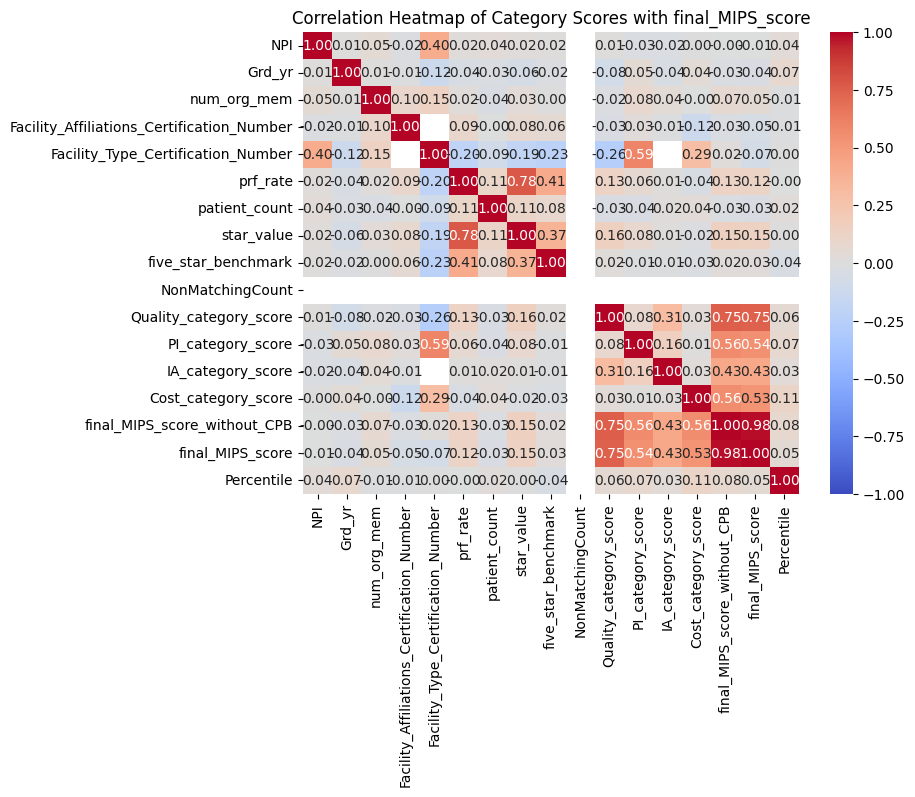

In [23]:
# Create a correlation matrix for heatmap
pandas_df = numeric_df.toPandas()
corr_matrix = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Category Scores with final_MIPS_score')
plt.show()

From the above diagram we know that factors affceting final_MIPS_score are:
- Quality_category_score - 0.75
- PI_category_score - 0.54
- IA_category_score - 0.43
- Cost_category_score - 0.53
- final_MIPS_score_without_CPB - 0.98

# Weighted Scoring System:
Idea: Use the factors that affect the final_MIPS_score (Quality, PI, IA, Cost, and final_MIPS_score_without_CPB) to assign weights and calculate a composite score. You can then use this composite score to determine the threshold dynamically.

Steps:
- Analyze the correlation or feature importance of each factor with the final_MIPS_score.
- Assign weights to each factor based on its impact on the final_MIPS_score. For example, if Quality_category_score has the highest correlation, give it a higher weight.
- Compute a new score for each NPI using the weighted average of the factors.
- Set a dynamic threshold by analyzing the distribution of this composite score (e.g., taking the top X percentile).

- Example Formula:

    ```math
    Weighted Score= 0.75 × Quality + 0.54 × PI + 0.43 × IA + 0.53 × Cost + 0.9 × Final MIPS Without CPB
    ```



In [28]:
# Add the new column 'Weighted_Score' to the dataframe
df_0_to_7 = df_0_to_7.withColumn(
    'Weighted_MIPS_Score',
    0.75 * F.col('Quality_category_score') +
    0.54 * F.col('PI_category_score') +
    0.43 * F.col('IA_category_score') +
    0.53 * F.col('Cost_category_score') +
    0.9 * F.col('final_MIPS_score_without_CPB')
)

df_0_to_7.select('NPI', 'Quality_category_score', 'PI_category_score', 'IA_category_score', 'Cost_category_score', 'final_MIPS_score_without_CPB', 'final_MIPS_score' ,'Weighted_MIPS_Score').show(5)

+----------+----------------------+-----------------+-----------------+-------------------+----------------------------+----------------+-------------------+
|       NPI|Quality_category_score|PI_category_score|IA_category_score|Cost_category_score|final_MIPS_score_without_CPB|final_MIPS_score|Weighted_MIPS_Score|
+----------+----------------------+-----------------+-----------------+-------------------+----------------------------+----------------+-------------------+
|1003007204|               83.9579|          81.1426|               40|               NULL|                     86.3217|         90.7459|               NULL|
|1003007204|               83.9579|          81.1426|               40|               NULL|                     86.3217|         90.7459|               NULL|
|1003007204|               83.9579|          81.1426|               40|               NULL|                     86.3217|         90.7459|               NULL|
|1003007204|               83.9579|          81.1426

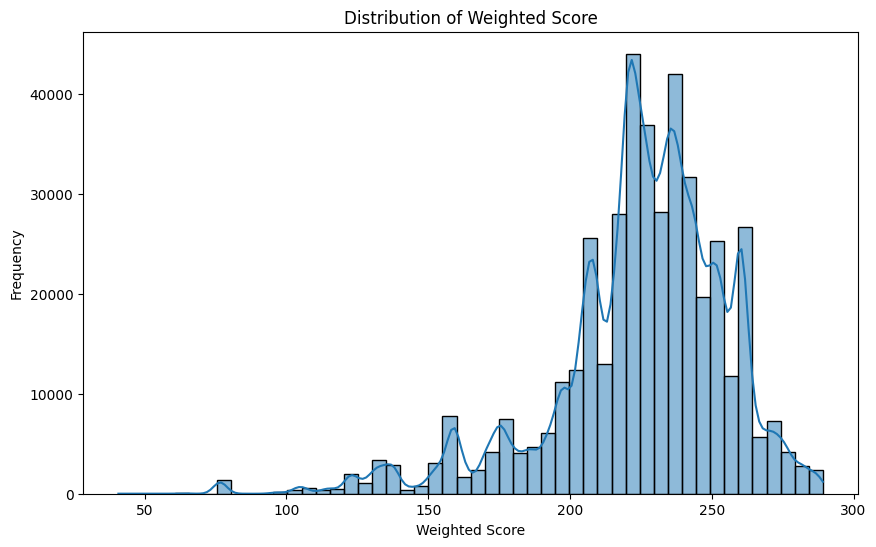

In [38]:
# Convert the dataframe to Pandas for plotting
pandas_df = df_0_to_7.select('Weighted_MIPS_Score').toPandas()

# Plot the distribution of the 'Weighted_Score' column
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['Weighted_MIPS_Score'], bins=50, kde=True)
plt.title('Distribution of Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')
plt.show()

Min-Max Normalization Formula
The formula to normalize values within a range of [0, 100] is:

```math
NormalizedWeighted Score = 100 × {max(weightedScore)−min(weighted Score) \over weighted Score − min(weighted Score)}
​


In [48]:
min_weighted_score = df_0_to_7.agg(F.min("Weighted_MIPS_Score")).collect()[0][0]
max_weighted_score = df_0_to_7.agg(F.max("Weighted_MIPS_Score")).collect()[0][0]

df_0_to_7 = df_0_to_7.withColumn(
    'normalized_weighted_MIPS_score',
    100 * (F.col('Weighted_MIPS_Score') - F.lit(min_weighted_score)) / (F.lit(max_weighted_score) - F.lit(min_weighted_score))
)

# Show the updated DataFrame with the normalized weighted score
df_0_to_7.select("NPI", "final_MIPS_score", "Weighted_MIPS_Score", "normalized_weighted_MIPS_score").filter(~F.col("normalized_weighted_MIPS_score").isNull()).groupBy('NPI').agg(F.mean('normalized_weighted_MIPS_score').alias('avg_normalized_weighted_MIPS_score')).show()

+----------+----------------------------------+
|       NPI|avg_normalized_weighted_MIPS_score|
+----------+----------------------------------+
|1013133016|                 72.15872175723983|
|1093725269|                  79.0708798997923|
|1275505562|                 71.92448042659086|
|1285668699|                 72.76847517470736|
|1649357104|                 77.82180827727115|
|1770838443|                 76.37915757341094|
|1326216490|                 80.84190091779203|
|1336125079|                 87.01387072026576|
|1376534149|                 86.53999570124802|
|1063603843|                 85.93324255506863|
|1093919664|                 68.36581815956961|
|1114160678|                  82.9576106023002|
|1376506253|                 47.26220213633489|
|1396127155|                 77.66821644457788|
|1619965589|                 85.79811281567486|
|1649214354|                 74.50375778545049|
|1073581385|                 74.19204553779062|
|1285782086|                 61.23997863

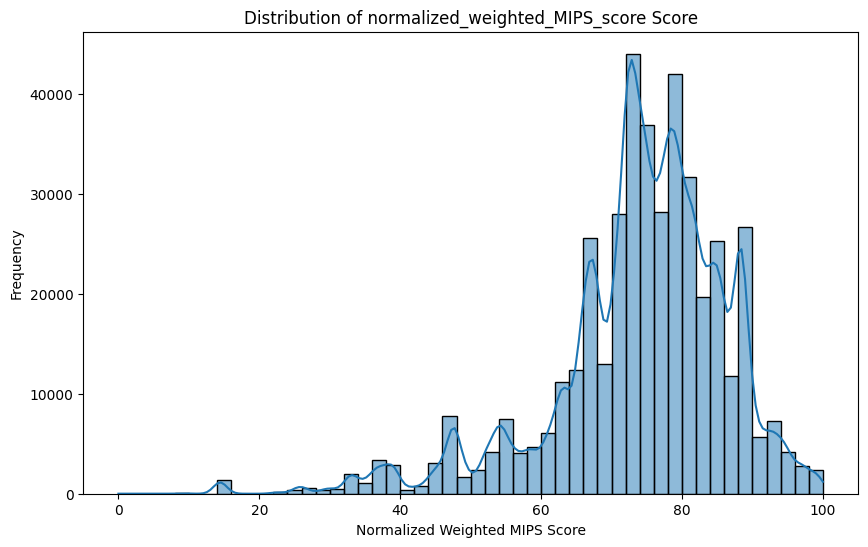

In [49]:
pandas_df = df_0_to_7.select('normalized_weighted_MIPS_score').toPandas()

# Plot the distribution of the 'Weighted_Score' column
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['normalized_weighted_MIPS_score'], bins=50, kde=True)
plt.title('Distribution of normalized weighted MIPS Score')
plt.xlabel('Normalized Weighted MIPS Score')
plt.ylabel('Frequency')
plt.show()

In [50]:
important_columns = [
    'NPI',
    'Quality_category_score', 
    'PI_category_score', 
    'IA_category_score', 
    'Cost_category_score', 
    'final_MIPS_score_without_CPB', 
    'final_MIPS_score',
    'weighted_MIPS_score',
    'normalized_weighted_MIPS_score'
]

# Select important columns and count null values
null_counts = df_0_to_7.select(
    [F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in important_columns]
)

null_counts.show()

+---+----------------------+-----------------+-----------------+-------------------+----------------------------+----------------+-------------------+------------------------------+
|NPI|Quality_category_score|PI_category_score|IA_category_score|Cost_category_score|final_MIPS_score_without_CPB|final_MIPS_score|weighted_MIPS_score|normalized_weighted_MIPS_score|
+---+----------------------+-----------------+-----------------+-------------------+----------------------------+----------------+-------------------+------------------------------+
|  0|                101865|           153061|            10852|             545295|                        7409|               0|             633926|                        633926|
+---+----------------------+-----------------+-----------------+-------------------+----------------------------+----------------+-------------------+------------------------------+



In [51]:
non_null_df = df_0_to_7.filter(
    ~F.col('Quality_category_score').isNull() &
    ~F.col('PI_category_score').isNull() &
    ~F.col('IA_category_score').isNull() &
    ~F.col('Cost_category_score').isNull() &
    ~F.col('final_MIPS_score_without_CPB').isNull() &
    ~F.col('final_MIPS_score').isNull() &
    ~F.col('weighted_MIPS_score').isNull() &
    ~F.col('normalized_weighted_MIPS_score').isNull()
)

agg_df = non_null_df.select(important_columns).groupBy('NPI').agg(
    F.mean('Quality_category_score').alias('avg_Quality_category_score'),
    F.mean('PI_category_score').alias('avg_PI_category_score'),
    F.mean('IA_category_score').alias('avg_IA_category_score'),
    F.mean('Cost_category_score').alias('avg_Cost_category_score'),
    F.mean('final_MIPS_score_without_CPB').alias('avg_final_MIPS_score_without_CPB'),
    F.mean('final_MIPS_score').alias('avg_final_MIPS_score'),
    F.mean('weighted_MIPS_score').alias('avg_weighted_MIPS_score'),
    F.mean('normalized_weighted_MIPS_score').alias('avg_normalized_weighted_MIPS_score')
)

agg_df.show(20)

+----------+--------------------------+---------------------+---------------------+-----------------------+--------------------------------+--------------------+-----------------------+----------------------------------+
|       NPI|avg_Quality_category_score|avg_PI_category_score|avg_IA_category_score|avg_Cost_category_score|avg_final_MIPS_score_without_CPB|avg_final_MIPS_score|avg_weighted_MIPS_score|avg_normalized_weighted_MIPS_score|
+----------+--------------------------+---------------------+---------------------+-----------------------+--------------------------------+--------------------+-----------------------+----------------------------------+
|1013133016|         93.33819999999956|                100.0|                 40.0|     22.031299999999955|               74.61080000000003|   74.61080000000003|     220.02995899999962|                 72.15872175723983|
|1093725269|         90.43530000000008|                 54.0|                 40.0|      91.18599999999988|         

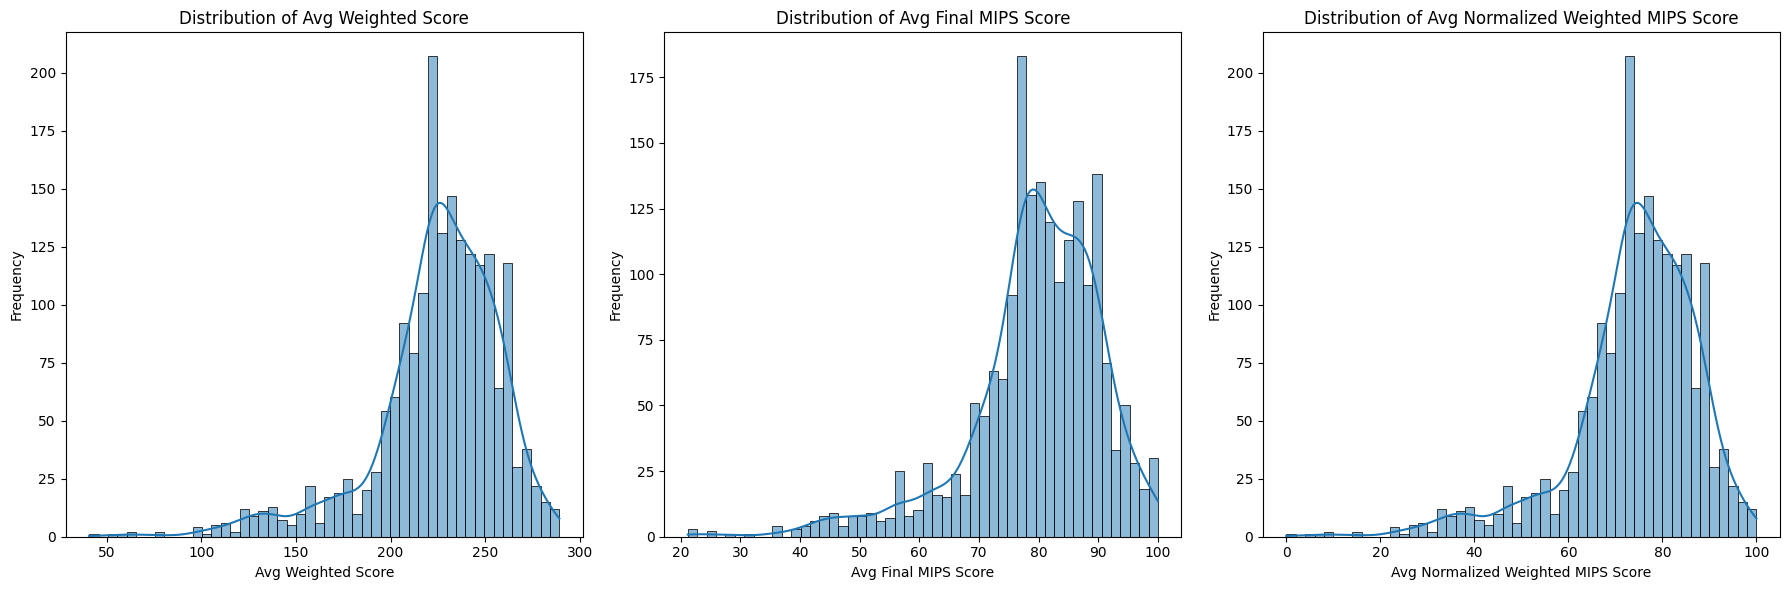

In [69]:
pandas_df = agg_df.select('avg_weighted_MIPS_score', 'avg_final_MIPS_score', 'avg_normalized_weighted_MIPS_score').toPandas()

# Plot the distributions in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot avg_weighted_MIPS_score distribution
sns.histplot(pandas_df['avg_weighted_MIPS_score'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Avg Weighted Score')
axes[0].set_xlabel('Avg Weighted Score')
axes[0].set_ylabel('Frequency')

# Plot avg_final_MIPS_score distribution
sns.histplot(pandas_df['avg_final_MIPS_score'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Avg Final MIPS Score')
axes[1].set_xlabel('Avg Final MIPS Score')
axes[1].set_ylabel('Frequency')

# Plot avg_normalized_weighted_MIPS_score distribution
sns.histplot(pandas_df['avg_normalized_weighted_MIPS_score'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Avg Normalized Weighted MIPS Score')
axes[2].set_xlabel('Avg Normalized Weighted MIPS Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

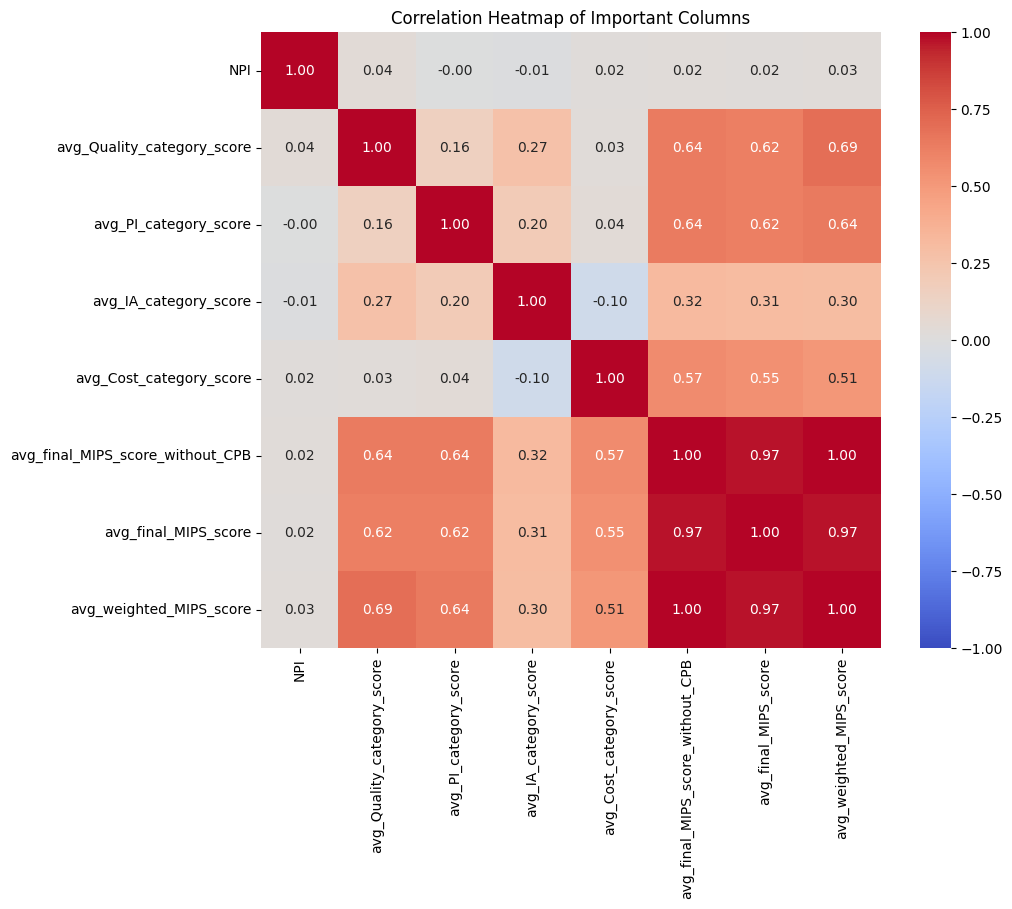

In [44]:

pandas_df = agg_df.toPandas()

# Create a correlation matrix for the important columns
corr_matrix = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Important Columns')
plt.show()

In [56]:
# Define the percentile threshold (e.g., top 20%)
percentile_threshold = 0.80

# Calculate the threshold value for the top X percentile
avg_weighted_threshold = pandas_df['avg_weighted_MIPS_score'].quantile(percentile_threshold)
final_mips_threshold = pandas_df['avg_final_MIPS_score'].quantile(percentile_threshold)
normalized_weighted_threshold = pandas_df['avg_normalized_weighted_MIPS_score'].quantile(percentile_threshold)

# Filter the DataFrame to include only rows with avg_weighted_MIPS_score above the threshold
# top_percentile_df = pandas_df[pandas_df['avg_weighted_MIPS_score'] > threshold_value]

# Display the threshold value and the filtered DataFrame
print(f"Averaged Weighted MIPS Score Threshold: {avg_weighted_threshold}")
print(f"Final MIPS Score Threshold: {final_mips_threshold}")
print(f"Normalized Weighted MIPS Score Threshold: {normalized_weighted_threshold}")
# top_percentile_df

Averaged Weighted MIPS Score Threshold: 251.31083899999993
Final MIPS Score Threshold: 88.49317999999988
Normalized Weighted MIPS Score Threshold: 84.74942824183437


# Z-Score Based Thresholding:
Idea: Use Z-scores to standardize each of the category scores (Quality, PI, IA, Cost, final_MIPS_without_CPB) and set a threshold for how many standard deviations an NPI’s score needs to be from the mean to be recommended.

Steps:
- Standardize each of the category scores by calculating the Z-score for each NPI.
- Create a composite Z-score (mean of the Z-scores across the factors).
- -Set a threshold, e.g., only NPIs with a composite Z-score above 1 (or any desired threshold) are recommended.

In [58]:
# Define the columns to standardize
columns_to_standardize = [
    'avg_Quality_category_score',
    'avg_PI_category_score',
    'avg_IA_category_score',
    'avg_Cost_category_score',
    'avg_final_MIPS_score_without_CPB'
]

# Calculate the mean and standard deviation for each column
agg_stats = agg_df.select(
    *[F.mean(c).alias(f'{c}_mean') for c in columns_to_standardize],
    *[F.stddev(c).alias(f'{c}_stddev') for c in columns_to_standardize]
).collect()[0]

agg_stats

Row(avg_Quality_category_score_mean=75.67647190676497, avg_PI_category_score_mean=89.35392569225378, avg_IA_category_score_mean=39.334910620399576, avg_Cost_category_score_mean=61.34038555906076, avg_final_MIPS_score_without_CPB_mean=78.19413261479143, avg_Quality_category_score_stddev=18.898241392845588, avg_PI_category_score_stddev=22.853028569382285, avg_IA_category_score_stddev=4.037153982078962, avg_Cost_category_score_stddev=20.39678595509026, avg_final_MIPS_score_without_CPB_stddev=11.197484185004205)

In [60]:
# Add Z-score columns to the DataFrame
for col in columns_to_standardize:
    mean = agg_stats[f'{col}_mean']
    stddev = agg_stats[f'{col}_stddev']
    agg_df = agg_df.withColumn(f'{col}_zscore', (F.col(col) - mean) / stddev)

agg_df.printSchema()

root
 |-- NPI: integer (nullable = true)
 |-- avg_Quality_category_score: double (nullable = true)
 |-- avg_PI_category_score: double (nullable = true)
 |-- avg_IA_category_score: double (nullable = true)
 |-- avg_Cost_category_score: double (nullable = true)
 |-- avg_final_MIPS_score_without_CPB: double (nullable = true)
 |-- avg_final_MIPS_score: double (nullable = true)
 |-- avg_weighted_MIPS_score: double (nullable = true)
 |-- avg_normalized_weighted_MIPS_score: double (nullable = true)
 |-- avg_Quality_category_score_zscore: double (nullable = true)
 |-- avg_PI_category_score_zscore: double (nullable = true)
 |-- avg_IA_category_score_zscore: double (nullable = true)
 |-- avg_Cost_category_score_zscore: double (nullable = true)
 |-- avg_final_MIPS_score_without_CPB_zscore: double (nullable = true)



In [61]:
# Create a composite Z-score (mean of the Z-scores across the factors)
zscore_columns = [f'{col}_zscore' for col in columns_to_standardize]
agg_df = agg_df.withColumn('composite_zscore', sum(F.col(c) for c in zscore_columns) / len(zscore_columns))
agg_df.select('NPI', 'avg_normalized_weighted_MIPS_score', 'composite_zscore').filter(~F.col('composite_zscore').isNull()).show()

+----------+----------------------------------+--------------------+
|       NPI|avg_normalized_weighted_MIPS_score|    composite_zscore|
+----------+----------------------------------+--------------------+
|1013133016|                 72.15872175723983|-0.13641404396513726|
|1093725269|                  79.0708798997923|  0.2579840946685591|
|1275505562|                 71.92448042659086|-0.17004518819186504|
|1285668699|                 72.76847517470736|-0.01785896931615...|
|1649357104|                 77.82180827727115| 0.19622689415390684|
|1770838443|                 76.37915757341094| 0.11820451799116687|
|1326216490|                 80.84190091779203| 0.30318420050823225|
|1336125079|                 87.01387072026576|  0.5984200135661041|
|1376534149|                 86.53999570124802|  0.5323477600241153|
|1063603843|                 85.93324255506863|  0.5203332072538011|
|1093919664|                 68.36581815956961|-0.30755950556354533|
|1114160678|                  82.9

In [62]:
# Set a threshold for recommendation (e.g., composite Z-score above 1)
threshold = 1
recommended_df = agg_df.filter(F.col('composite_zscore') > threshold)
recommended_df.select('NPI', 'avg_normalized_weighted_MIPS_score', 'composite_zscore').show()

+----------+----------------------------------+------------------+
|       NPI|avg_normalized_weighted_MIPS_score|  composite_zscore|
+----------+----------------------------------+------------------+
|1760487706|                 98.46041887876626|1.0860033397432756|
|1700842697|                 99.65803186389533| 1.135983690528239|
|1225092554|                  98.3114115765233|1.0725686249188178|
|1295776037|                 97.38656406549255|1.0506110973130673|
|1285637181|                             100.0| 1.152087659843682|
|1669407227|                             100.0| 1.152087659843682|
|1285960872|                 97.54761833844383|1.0366000606850778|
|1255318044|                 97.51026588666593|1.0348410583869676|
|1306986930|                 96.61418338604827|1.0193596147127866|
|1689673683|                 97.22875398177985|1.0331358836629507|
|1376672717|                 97.05012232122952|1.0131719697318133|
|1215983440|                  99.9425223048068|1.1498558719928

In [64]:
# Show the recommended NPIs
recommended_df.select('NPI', 'avg_final_MIPS_score', 'avg_weighted_MIPS_score','composite_zscore').show()

+----------+--------------------+-----------------------+------------------+
|       NPI|avg_final_MIPS_score|avg_weighted_MIPS_score|  composite_zscore|
+----------+--------------------+-----------------------+------------------+
|1760487706|               98.75|                285.375|1.0860033397432756|
|1700842697|               100.0|     288.35039999999964| 1.135983690528239|
|1225092554|   98.42679999999979|     285.00480000000005|1.0725686249188178|
|1295776037|   98.09029999999986|      282.7070699999991|1.0506110973130673|
|1285637181|               100.0|     289.20000000000005| 1.152087659843682|
|1669407227|               100.0|     289.20000000000005| 1.152087659843682|
|1285960872|               100.0|     283.10720000000015|1.0366000606850778|
|1255318044|               100.0|               283.0144|1.0348410583869676|
|1306986930|    97.5008999999994|      280.7881350000007|1.0193596147127866|
|1689673683|               100.0|      282.3150000000014|1.0331358836629507|

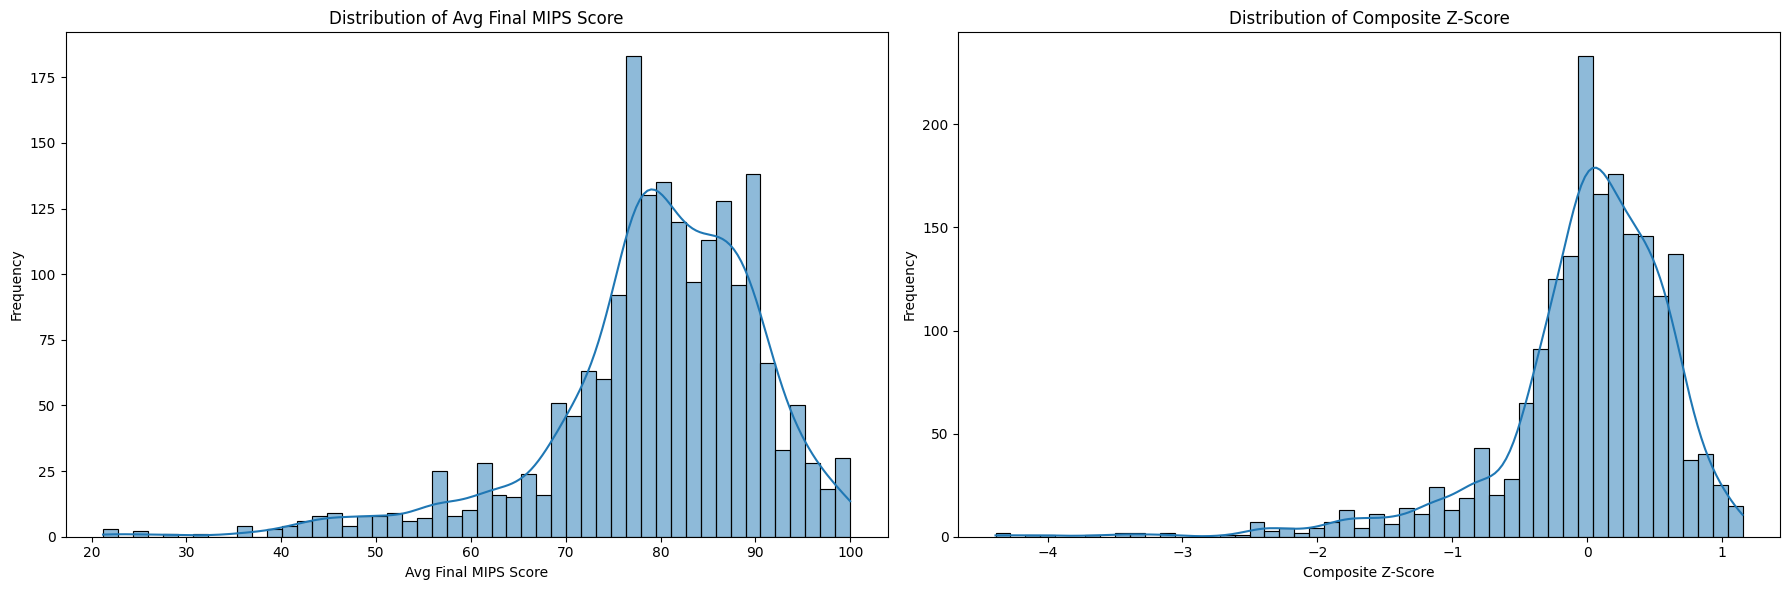

In [66]:
# Convert the dataframe to Pandas for plotting
pandas_df = agg_df.select('avg_final_MIPS_score', 'composite_zscore').toPandas()

# Plot the distributions in subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot avg_final_MIPS_score distribution
sns.histplot(pandas_df['avg_final_MIPS_score'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Avg Final MIPS Score')
axes[0].set_xlabel('Avg Final MIPS Score')
axes[0].set_ylabel('Frequency')

# Plot composite_zscore distribution
sns.histplot(pandas_df['composite_zscore'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Composite Z-Score')
axes[1].set_xlabel('Composite Z-Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

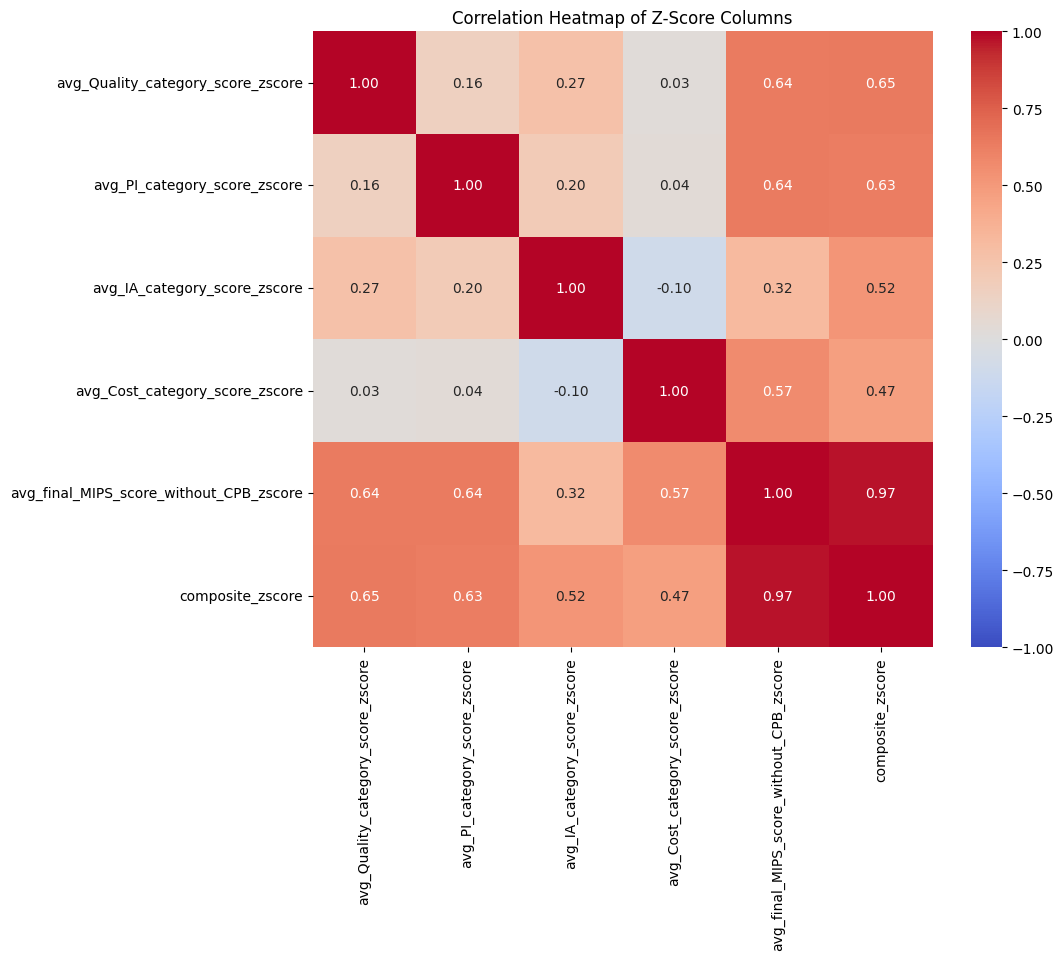

In [70]:
# Convert the dataframe to Pandas for plotting
pandas_df = agg_df.select(
    'avg_Quality_category_score_zscore', 
    'avg_PI_category_score_zscore', 
    'avg_IA_category_score_zscore', 
    'avg_Cost_category_score_zscore', 
    'avg_final_MIPS_score_without_CPB_zscore', 
    'composite_zscore'
).toPandas()

# Create a correlation matrix for the z-score columns
corr_matrix_zscore = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_zscore, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Z-Score Columns')
plt.show()

# Machine Learning Model (Predictive Scoring):
Idea: Train a machine learning model (e.g., Random Forest, XGBoost) to predict whether an NPI should be recommended based on the features Quality_category_score, PI_category_score, etc.

Steps:
- Use historical data to create a training set where the target variable is whether the NPI was recommended based on the final_MIPS_score > 75.
- Train the model using Quality_category_score, PI_category_score, IA_category_score, Cost_category_score, and final_MIPS_score_without_CPB as features.
- Use the trained model to predict which NPIs should be recommended.

In [5]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import functions as F

In [6]:
# Step 1: Create a target column 'recommend_npi' based on final_MIPS_score > 75
df = df_0_to_7.withColumn("recommend_npi", F.when(F.col("final_MIPS_score") > 75, 1).otherwise(0))
df.select("final_MIPS_score", "recommend_npi").show(5)

+----------------+-------------+
|final_MIPS_score|recommend_npi|
+----------------+-------------+
|         90.7459|            1|
|         90.7459|            1|
|         90.7459|            1|
|         90.7459|            1|
|         90.7459|            1|
+----------------+-------------+
only showing top 5 rows



In [7]:
# Step 2: Select the relevant feature columns
feature_cols = [
    'Quality_category_score', 
    'PI_category_score', 
    'IA_category_score', 
    'Cost_category_score', 
    'final_MIPS_score_without_CPB'
]

In [13]:
# Step 3: Assemble the feature columns into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip") 

In [14]:
# Step 4: Initialize the RandomForestClassifier
rf = RandomForestClassifier(labelCol="recommend_npi", featuresCol="features", numTrees=100)

In [15]:
# Step 5: Build a pipeline
pipeline = Pipeline(stages=[assembler, rf])

In [11]:
# Step 6: Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
train_data.show(5)

+----------+----------+---------------+------------------+-------------------+--------------------+----+----+----+--------------------+------+--------------------+--------------------+-----------------+----------+----------+--------------------+--------+--------------------+----------+-----------+----------------+---------+---------+---------+-----+---------+----------------+---------+---------+--------------------+---------+----------+------------------+-------------------+--------------------+----+-------------+------------------------------------------+----------------------------------+----------+------------------+-------------------+----------+----------+----------+----------+-------------+--------------------+--------+-----------------+--------+-------------+----------+-------------------+---------------+--------+----------------+----------+------------------+-------------------+----------+-------------------------------------------+-------------+----------------------+---------

In [16]:
# Step 7: Train the model
model = pipeline.fit(train_data)

In [17]:
# Step 8: Make predictions on the test set
predictions = model.transform(test_data)

In [18]:
# Step 9: Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="recommend_npi", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)

In [19]:
# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9976106482256936


In [28]:
# Show some sample predictions
predictions.select("NPI", "final_MIPS_score", "recommend_npi", "prediction", "probability").distinct().show(10)

+----------+----------------+-------------+----------+--------------------+
|       NPI|final_MIPS_score|recommend_npi|prediction|         probability|
+----------+----------------+-------------+----------+--------------------+
|1023084449|         86.2108|            1|       1.0|[8.83823839858843...|
|1053374694|         90.4168|            1|       1.0|[0.00162395352790...|
|1407965668|         86.7191|            1|       1.0|[0.00132136285816...|
|1811131311|         51.3224|            0|       0.0|[0.95395582202767...|
|1396897617|         79.8498|            1|       1.0|[0.00378227161447...|
|1447454103|          61.205|            0|       0.0|[0.91253749975696...|
|1750312948|         90.6466|            1|       1.0|[8.83823839858843...|
|1760978902|         80.8551|            1|       1.0|[7.48373567997406...|
|1326199530|         78.7946|            1|       1.0|[0.00162395352790...|
|1528371895|          85.078|            1|       1.0|[0.00132136285816...|
+----------+

In [29]:
# Convert the predictions to a Pandas DataFrame for plotting
predictions_pd = predictions.select('final_MIPS_score', 'recommend_npi', 'prediction', 'probability').toPandas()

# Extract the probability of the positive class
predictions_pd['probability'] = predictions_pd['probability'].apply(lambda x: x[1])

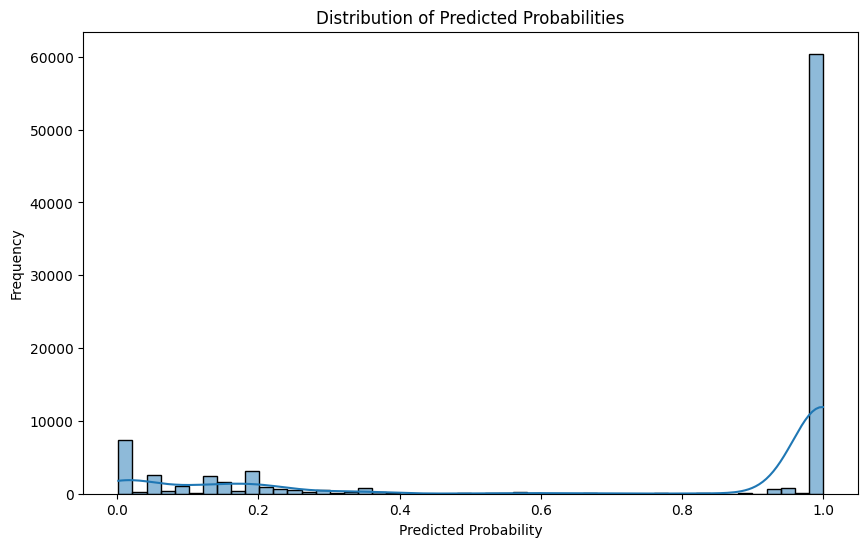

In [30]:
# Plot the distribution of the predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(predictions_pd['probability'], bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

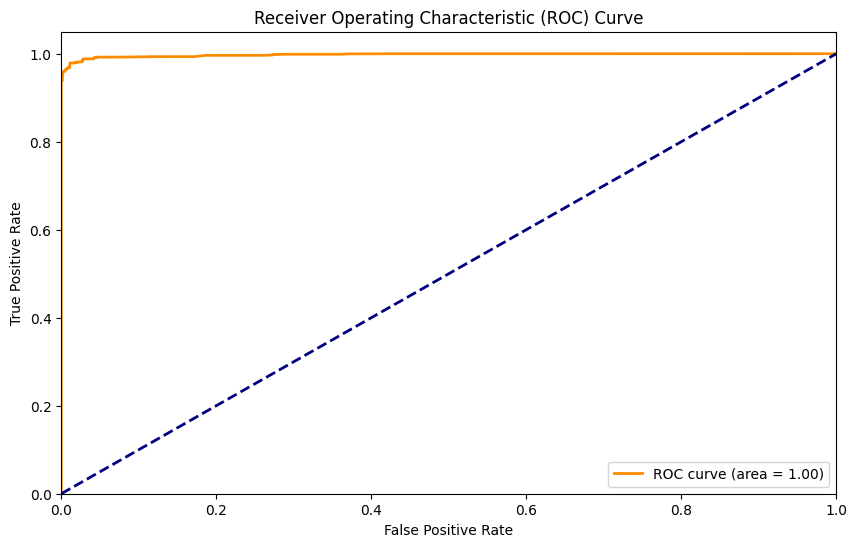

In [33]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(predictions_pd['recommend_npi'], predictions_pd['probability'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

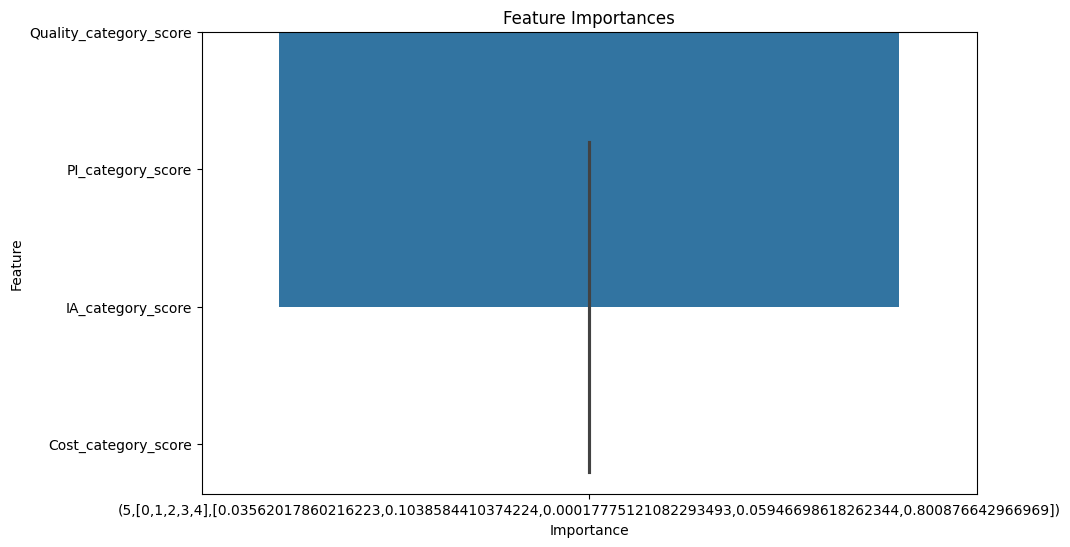

In [34]:
# Plot feature importances
feature_importances = model.stages[-1].featureImportances
features = feature_cols

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()